## Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

In [2]:
train_df = pd.read_pickle("train_df.pkl")
test_df  = pd.read_pickle("test_df.pkl")

WINDOW = 30
HORIZON = 1

features = ["Open", "High", "Low", "Close", "Volume"]

In [4]:
model = load_model("1day_model.keras")

In [5]:
# %%
def predict_one_stock(model, df, stock, window=30, horizon=1):
    s = df[df["Stock"] == stock].copy()

    data = s[features].values
    target = s["Return"].values

    X, y = [], []

    for i in range(window, len(s) - horizon):
        X.append(data[i-window:i])
        y.append(target[i+horizon])

    X = np.array(X)
    y = np.array(y)

    y_pred = model.predict(X, verbose=0).flatten()

    return y, y_pred

In [6]:
# %%
def plot_predictions(y_true, y_pred, stock, rmse):
    plt.figure(figsize=(12, 5))

    plt.plot(y_true, label="True Return", linewidth=2)
    plt.plot(y_pred, label="Predicted Return", linewidth=2)

    plt.title(f"{stock} – True vs Predicted Returns (RMSE = {rmse:.6f})")
    plt.xlabel("Time")
    plt.ylabel("Return")

    plt.legend()
    plt.grid(True)
    plt.show()

Stock: AMZN
RMSE: 0.036063588954278046


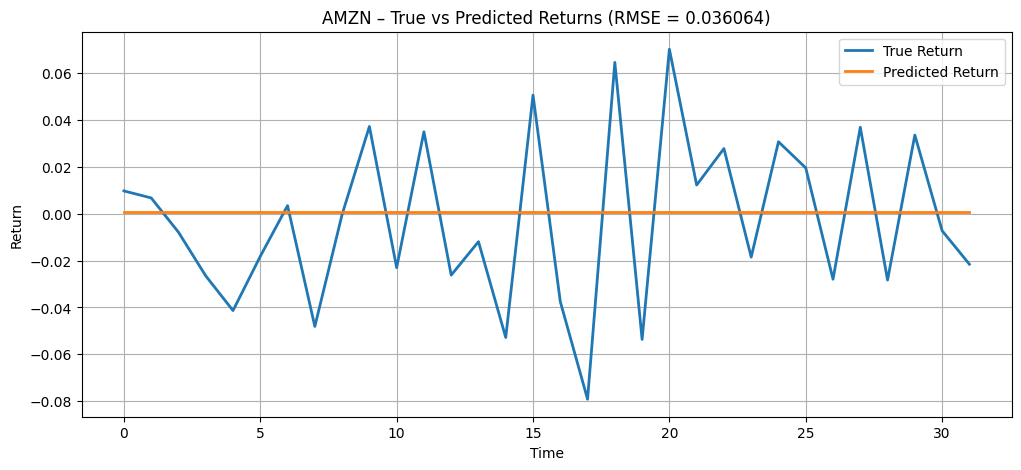

In [10]:
# %%
stock_name = test_df["Stock"].unique()[4]

y_true, y_pred = predict_one_stock(
    model,
    test_df,
    stock_name,
    window=WINDOW,
    horizon=HORIZON
)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("Stock:", stock_name)
print("RMSE:", rmse)

plot_predictions(y_true, y_pred, stock_name, rmse)

In [8]:
# %%
results = []

for stock in test_df["Stock"].unique():
    y_true, y_pred = predict_one_stock(
        model,
        test_df,
        stock,
        window=WINDOW,
        horizon=HORIZON
    )

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    results.append({
        "Stock": stock,
        "RMSE": rmse
    })

pd.DataFrame(results).sort_values("RMSE")

,Stock,RMSE
4,AMZN,0.036064
7,EA,0.045126
8,GOOGL,0.046601
10,IBM,0.051023
5,CRM,0.054165
6,CSCO,0.054579
14,NOW,0.055467
0,AAPL,0.056190
12,MSFT,0.059127
16,ORCL,0.061159
